In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

from QubosandCircuits  import *
from QAOA_Optimization import * 

provider = IBMQ.load_account()
qiskit.__qiskit_version__


C:\Users\Hannah\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.2',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.2'}

<class 'qiskit.providers.ibmq.accountprovider.AccountProvider'>


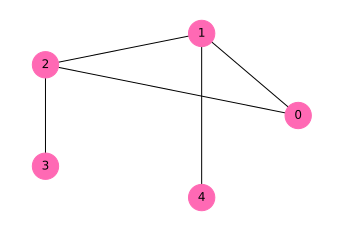

In [2]:
n =  5
graph = nx.Graph()
graph.add_nodes_from(range(n))
graph.add_edges_from([(0, 1), (0,2),(4,1),(2,3),(2,1)] )
plot_result(graph, n*[0],n)
print(type(provider))

<class 'qiskit.providers.aer.backends.qasm_simulator.QasmSimulator'>


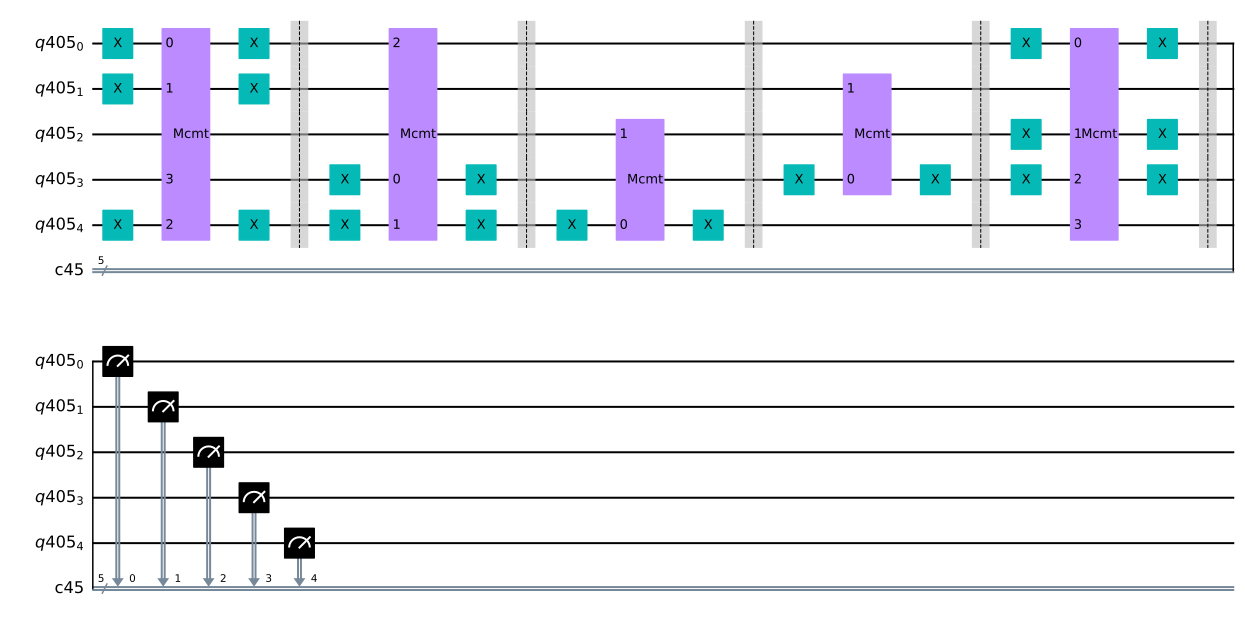

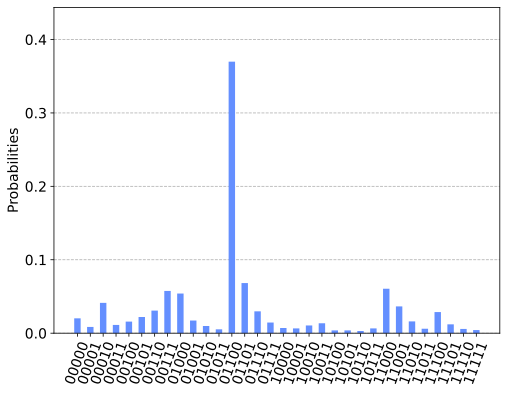

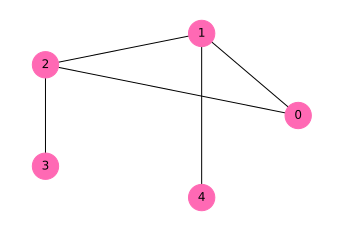

In [4]:
backend      = Aer.get_backend("qasm_simulator")
print(type(backend))
data = QAOAforMaximumClique(graph,
                                                 qubo = 'mixerrandminus',
                                                 backend = backend,
                                                 #(qubo1,qubo2,qubo3,mixer,mixerdicke,mixersim)
                                                 #shots, When shots is false n*400 is used (look for a beter version) 
                                                 shots = 4000,
                                                 #if p = False then p is 1 
                                                 p = 1,
                                                 #enable to use the qiskit library
                                                 library = False,
                                                 #the method for finding the starting 
                                                 #points of the minimazation                                
                                                 angleselection = 'monte-carlo', #(monte-carlo, basin-hopping)
                                                 #need for monte-carlo
                                                 guesses = 1,#if False guesses = n                                                
                                                 #only when library is false 
                                                 optimizer = 'python', #(gradientdescent,python)                                             
                                                 #enable to plot the graph
                                                 plotgraph = True,
                                                 #enable to plot the transpiled version of the circuit
                                                 transpiled = False, #todo
                                                 #enable to plot the circuit
                                                 plotcircuit = True,
                                                 #enable to plot the results histogram
                                                 histogram = True,
                                                 startangles = [],
                                                 #only neede for mixerrand 
                                                 # a list for all guesses of lists for for all p with permuations of 0 to n - 1
                                                 orderings = [] ,
                                                 executeallguesses = False,
                                                 plotoptangles = False,
                     noise=True,
                     provider = provider
                                                )

In [5]:
print(data)

[[(0, 1), (0, 2), (1, 4), (1, 2), (2, 3)], [0.0575], [2.2367500000000002], [22], 0, 0, 5, [[0, 0, 1, 1, 1]], 1, 'mixerrandminus', 'python', 'monte-carlo', 1, [0, 6.283185307179586, 0, 3.141592653589793], 4000, [[[0.5314118378467676]]], [[[1.7800469940967676]]], [[[3, 0, 2, 1, 4]]], QasmSimulator(
backend_name='qasm_simulator', provider=AerProvider()), False, False, False, False, False, False, True]
